In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.optimize as opt;

In [24]:
def electron_E(temp, wf):
    A_0 = 1.20173e6 #A•m^-2•K^-2
    k = 1.380649e-23 #J/K
    lam_0 = 0.5
    A_g = lam_0 * A_0 #A•m^-2•K^-2
    T = temp + 273.5 # Kelvin
    W = wf # Joules
    J = A_g*(T**(2))*np.exp(-W/(k*T))
    return J 

# Finds the number of electrons generated
# J is the current density
def electron_num(J):
    electrons = 6.241509e18 #electron/second
    return J*electrons

def array_builder(wf):
    electron_number_array = []
    for i in range(0, 1200):
        electron_number_array.append(electron_num(electron_E(i, wf)))
    return electron_number_array

def eV_to_J(unit):
    return unit/6.242e+18

In [33]:
temp = np.linspace(0,1200, 1200)
tungsten_data = array_builder(eV_to_J(4.50))
titanium_data = array_builder(eV_to_J(3.84))
copper_data = array_builder(eV_to_J(5.10))
lithium_data = array_builder(eV_to_J(2.9))
iron_data = array_builder(eV_to_J(4.81))
aluminum_data = array_builder(eV_to_J(4.03))

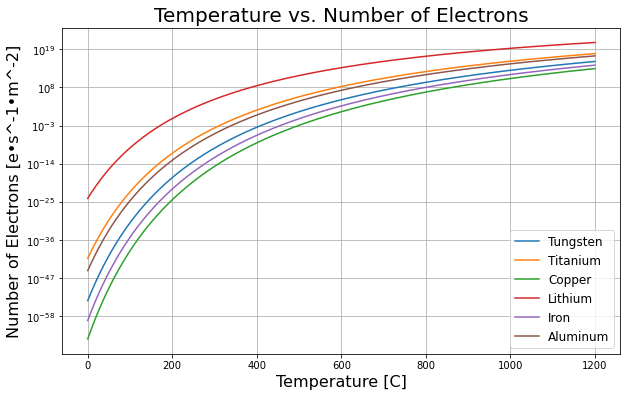

In [34]:
plt.figure(figsize=(10,6))
plt.semilogy(temp, tungsten_data, label="Tungsten")
plt.semilogy(temp, titanium_data, label="Titanium")
plt.semilogy(temp, copper_data, label="Copper")
plt.semilogy(temp, lithium_data, label="Lithium")
plt.semilogy(temp, iron_data, label="Iron")
plt.semilogy(temp, aluminum_data, label="Aluminum")
plt.xlabel("Temperature [C]", size=16)
plt.ylabel("Number of Electrons [e•s^-1•m^-2]", size=16)
plt.title("Temperature vs. Number of Electrons", size=20)
plt.grid()
plt.legend(loc="lower right", fontsize=12)
plt.show()